# **Ejemplo 5:** Escalamiento de datos

In [ ]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
# Preprocesado
#==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector

# Creación del conjunto de datos (dos máquinas embotelladoras)
# ==============================================================================
muA, sigmaA = 1000, 1 # media y desviación estándar embotelladora A
muB, sigmaB = 1000, 4 # media y desviación estándar embotelladora B
datosA = np.random.normal(muA, sigmaA, 1000)
datosB = np.random.normal(muB, sigmaB, 1000)
datos=np.column_stack((datosA, datosB))

# Título: ¿qué es un DataFrame?
#Url: https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/#entonces-qu%C3%A9-es-un-dataframe
Data = pd.DataFrame(datos, columns=['Embotelladora_A', 'Embotelladora_B'])

# Escalamiento
# ==============================================================================
# Selección de columnas numéricas
numeric_cols = Data.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Data_prep_SS = preprocessor_SS.fit_transform(Data)
Data_prep_RR = preprocessor_RR.fit_transform(Data)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)
Data_prep_SS_v2  = preprocessor_SS.transform(Data) # Podemos observar que los resultados son los mismos que el método fit_transform

# Título: Diferencia entre fit_transform() y transform() en Scikit-Learn
# Url: https://forum.huawei.com/enterprise/es/diferencia-entre-fit-transform-y-transform-en-scikit-learn/thread/891275-100757

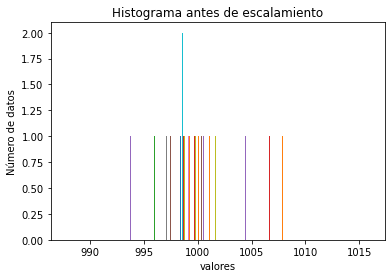

In [ ]:
# Tarda unos dos minutos en ejecutarse
plt.hist(Data, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma antes de escalamiento')
plt.show()

Representacióón de los datos escalado con **Standard Scaler**
 - Estandariación/Escalamiento por desviación típica


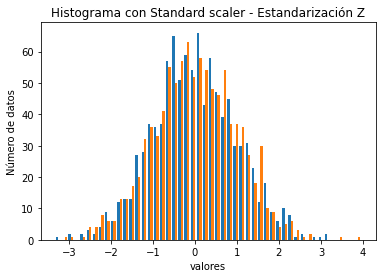

In [ ]:
plt.hist(Data_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con Standard scaler - Estandarización Z')
plt.show()

**NOTA** Observar que las **dos** variables tienen la misma desviación típica (s=1)

In [ ]:
Data_prep_SS.std()


0.9999999999999998

Representación de los datos escalado con **Min Max Scaler** - Estandariación/Escalamiento por rangos



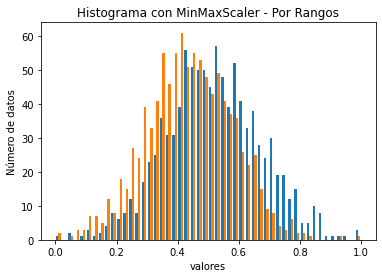

In [ ]:
plt.hist(Data_prep_RR, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con MinMaxScaler - Por Rangos')
plt.show()

**NOTA** Observar que las **dos** variables tienen el mismo rango

In [ ]:
#Rango
#Data_prep_RR[:,0]
np.max(Data_prep_RR[:,0])-np.min(Data_prep_RR[:,0])

1.0

In [ ]:
#Rango
#Data_prep_RR[:,1]
np.max(Data_prep_RR[:,1])-np.min(Data_prep_RR[:,1])

1.0

In [ ]:
# a. (2 Puntos) ¿Cuánto vale la media, mediana, la desviación estándar muestral, 
# la varianza muestral y el rango de la variable X?

import numpy as np

x = [1,2,3,4,5,6,7,8,9,10]

media = np.mean(x)
mediana = np.median(x)
desviacion = np.std(x)
varianza = np.var(x)
rango = np.argsort(x)

print(f" Media = {media}, Mediana = {mediana}")
print(f" Desviación estándar = {desviacion}, Varianza = {varianza}")
print(f" Rango = {rango}")

 Media = 5.5, Mediana = 5.5
 Desviación estándar = 2.8722813232690143, Varianza = 8.25
 Rango = [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# b. (1 Punto) Utilizar la función describe() de Panda, para obtener la media, 
# desviación estándar, etc…

import pandas as pd

Datos = pd.DataFrame(x, columns=['Descripción'])
print(Datos.describe())

       Descripción
count     10.00000
mean       5.50000
std        3.02765
min        1.00000
25%        3.25000
50%        5.50000
75%        7.75000
max       10.00000


In [ ]:
#c. (1 Punto) ¿Por qué el resultado de calcular la desviación estándar con 
# Numpy es diferente a la calculada por describe de Panda? ¿Qué ajuste sería
# necesario realizar para que los resultados fuesen similares/iguales?

# ddof: grado de libertad, en Pandas es 1 y en Numpy es 0 por defecto

desviacion_pd = Datos.std()
desviacion_ajustada = np.std(x, ddof=1) # ddof: grado de libertad

print(f" Desviación Numpy = {desviacion}")
print(f" Desviación Pandas = {desviacion_pd}")
print(f" Desviación Numpy (ajustada)= {desviacion_ajustada}")

 Desviación Numpy = 2.8722813232690143
 Desviación Pandas = Descripción    3.02765
dtype: float64
 Desviación Numpy (ajustada)= 3.0276503540974917


In [ ]:
# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
col_num = Datos.select_dtypes(include=['float64', 'int']).columns.to_list()
escalamiento = ColumnTransformer(
                   [('scale', MinMaxScaler(), col_num)],remainder='passthrough')

Datos_Rango = escalamiento.fit_transform(Datos)
media_rango = np.mean(Datos_Rango)
mediana_rango = np.median(Datos_Rango)
print(f" Media = {media_rango}, Mediana = {mediana_rango}")

 Media = 0.5, Mediana = 0.5


In [ ]:
# Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
z_score = ColumnTransformer(
                   [('scale', StandardScaler(), col_num)],remainder='passthrough')

Datos_Z = z_score.fit_transform(Datos)
media_Z = np.mean(Datos_Z)
mediana_Z = np.median(Datos_Z)
print(f" Media = {media_Z}, Mediana = {mediana_Z}")

 Media = -6.661338147750939e-17, Mediana = 0.0
